#                                            SVD-разложение

## Описание метода SVD- разложения

SVD (Singular Value Decomposition) - сингулярное разложение

В случае произвольной матрицы X имеет место так называемое сингулярное разложение. Пусть $A$ — произвольная матрица, тогда существуют такие ортогональные матрицы $U$ и $V$, а также диагональная матрица $D$, что:

$$ A = U · D · V $$

Сингулярное разложение раскрывает геометрическую структуру линейного преобразования, задаваемого
матрицей X: представляет его в виде последовательных вращения, рястяжения по осям и еще одного вращения.

1. Для вывода SVD-разложением воспользуемся полярным разложением
Любую матрицу $A$ можно представить в виде произведения ортогональной матрицы $Q$ и симметричной матрицы $S$:
$$ A = QS $$

2. Найдем $S$ и $Q$
$$A^TA=SQ^TQS=S^2$$
$$S = \sqrt{A^TA} $$
Зная $S$ и $A$ можно найти $Q$:
$$ Q = AS^{-1}$$

3. Симметричная матрица $S$ имеет спетральное разложение:
$$S=XLX^T$$
Симметричные матрицы имеют полный набор собственных значений, а собственные
векторы могут быть выбраны ортогональными. Таким образом, приходим к следующей формуле:
$$ A = QXLX^T$$
В данной формуле $Q$,$X$ – ортогональные матрицы, поэтому их произведением является также ортогональная матрица $Y = QX$

4. Подставляя все в одну формулу, получаем SVD-разложение:
$$ A = YLX^T$$


P.S алгоритмы с использованием спектрального разложения описаны в pdf файле стра 15-18

## Области применения SVD-разложения

###  Метод главных компонент
Метод главных компоненыт- один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Изобретен К.Пирсоном в 1901 г. Применяется во многих областях, таких как распознавание образов, компьютерное зрение, сжатие данных и т.п.

### Понижение размерности
Ярким примером задачи понижения размерности является задача из области машинного обучения.
Будем рассматривать определенный класс объектов, каждый из которых можно представить с помощью конечного набора количественных и качественных характеристик, которые образуют вектор $(𝑥_1, ..., 𝑥_𝑁)^𝑇$. Рассмотрим набор, состоящий только из 𝑛 количественных характеристик (𝑛 ≤ 𝑁). Т.о. каждому объекту ставится в соответствие вектор действительных чисел $(𝑥_{𝑖_1}, ..., 𝑥_{𝑖_𝑛})^𝑇$, ${𝑖1, ..., 𝑖𝑛} ⊂ {1, ..., 𝑁}$. Без ограничения общности будем предполагать, что $(𝑖_1, ..., 𝑖_𝑛) ≡ (1, ..., 𝑛)$.

Предположим, что обучающая выборка содержит 𝑀 различных объектов, каждый из
которых описывается вектором 𝑛 действительных чисел. В таком случае каждый объект можно представить радиус-вектором 𝑛-мерного пространства, а всю обучающую выборку – матрицей $𝐴_{𝑛×𝑀}$.

Часто бывает так, что 𝑛 достаточно велико и работать с матрицей обучающей выборки либо неудобно, либо тяжело. В таком случае есть смысл попробовать понизить размерность матрицы, потеряв при этом наименьшее количество информации: рассматривать
вместо вектора $(𝑥_1, ..., 𝑥_𝑁)^𝑇$, вектор $(𝑦_1, ..., 𝑦_𝑘)^𝑇$, причем 𝑘 < 𝑛.

Однако проблема стоит не только в том, чтобы понизить размерность матрицы обучающей выборки, но также разработать алгоритм перевода любого вектора $(𝑥_1, ..., 𝑥_𝑁)^𝑇$ в
соответствующий ему вектор $(𝑦_1, ..., 𝑦_𝑘)^𝑇$.

### Cжатие изображения 
Сингулярное разложение оказывается очень удобным механизмом сжатия изображений с минимальной потерей информации.

### Рекомендательные системы
SVD разложение активно используется в реализациях рекомендательных систем

## Пример применения

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import svd
from PIL import Image
%matplotlib inline

In [47]:
def compress_image(img_name, k):
    img = img_name
    
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    ur,sr,vr = svd(r, full_matrices=False)
    ug,sg,vg = svd(g, full_matrices=False)
    ub,sb,vb = svd(b, full_matrices=False)
    rr = np.dot(ur[:,:k],np.dot(np.diag(sr[:k]), vr[:k,:]))
    rg = np.dot(ug[:,:k],np.dot(np.diag(sg[:k]), vg[:k,:]))
    rb = np.dot(ub[:,:k],np.dot(np.diag(sb[:k]), vb[:k,:]))

    rimg = np.zeros(img.shape)
    rimg[:,:,0] = rr
    rimg[:,:,1] = rg
    rimg[:,:,2] = rb
    
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1,ind2,ind3] = abs(value)
                if value > 255:
                    rimg[ind1,ind2,ind3] = 255

    compressed_image = rimg.astype(np.uint8)
    
    plt.imshow(compressed_image)

In [48]:
img = Image.open('putin.jpg')
putin = np.asarray(img, dtype='uint8')

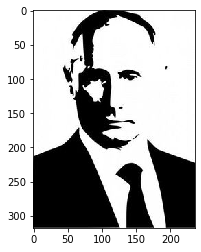

In [52]:
plt.imshow(putin)

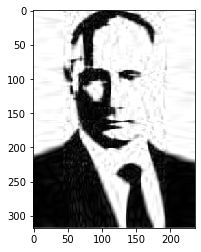

In [51]:
compress_image(putin, 20)  #чем меньше число, тем меньше "плющит" Путина